In [39]:
from qiskit import __version__
print(__version__)
%pip install qiskit-aer

1.3.2
Note: you may need to restart the kernel to use updated packages.


In [40]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_vector, plot_bloch_multivector

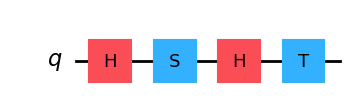

In [41]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

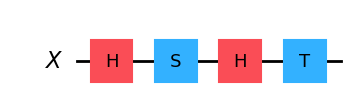

In [42]:
# We could also name our qubits if we wish as 
X = QuantumRegister(1, 'X')
# creating a single qubit system 
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

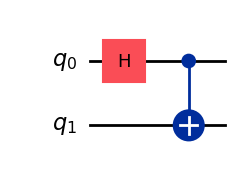

<IPython.core.display.Latex object>

Creating Bell state for |00>


<IPython.core.display.Latex object>

Creating Bell state for |01>


<IPython.core.display.Latex object>

Creating Bell state for |10>


<IPython.core.display.Latex object>

Creating Bell state for |11>


<IPython.core.display.Latex object>

Circuit with CZ gate addition


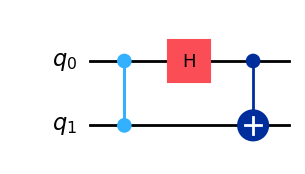

Bell states generated with CZ gate at the beggining
Creating Bell state for |00>


<IPython.core.display.Latex object>

Creating Bell state for |01>


<IPython.core.display.Latex object>

Creating Bell state for |10>


<IPython.core.display.Latex object>

Creating Bell state for |11>


<IPython.core.display.Latex object>

In [43]:
# To create a bell state generator circuit. will be for two qubits 

qc = QuantumCircuit(2) 
qc.h(0)
qc.cx(0, 1) # CNOT gate with q0 as control and q1 as target
display(qc.draw(output="mpl"))

psi = Statevector.from_label('0') # |0>
phi = Statevector.from_label('0') # |0>
state = psi.tensor(phi) # |0>|0>

evolved_state = state.evolve(qc)

display(evolved_state.draw('latex'))

# created a bell state |  phi + > = 1/sqrt(2) (|00> + |11>)

# To create the rest Lets create a function 

def create_bell_state(qubit1, qubit2):
    psi = Statevector.from_label(qubit1) # |0>
    phi = Statevector.from_label(qubit2) # |0>
    state = psi.tensor(phi) 
    evolved_state = state.evolve(qc)
    print(f"Creating Bell state for |{qubit1}{qubit2}>")
    display(evolved_state.draw('latex'))
    return evolved_state

phi_pos = create_bell_state('0', '0')
phi_neg = create_bell_state('0', '1')
psi_pos = create_bell_state('1', '0')
psi_neg_without_z = create_bell_state('1', '1')


# In order to get rid of the minus sign in the last state we can apply a controlled Z gate the beginning.
# Which does the following operations CZ|00> = |00> and CZ|11> = -|11> 
# and CZ|01> = |01> and CZ|10> = |10>
# Because Z|1> = -|1> and Z|0> = |0>
#lets try it.

qc = QuantumCircuit(2) 
qc.cz(0, 1) # CNOT gate with q0 as control and q1 as target
qc.h(0)
qc.cx(0, 1) # CNOT gate with q0 as control and q1 as target
print("Circuit with CZ gate addition")
display(qc.draw(output="mpl"))

# now checking whether the sign issue is resolved. 
print("Bell states generated with CZ gate at the beggining")
phi_pos = create_bell_state('0', '0')
phi_neg = create_bell_state('0', '1')
psi_pos = create_bell_state('1', '0')
psi_neg = create_bell_state('1', '1')

# Z gate adds a global phase to the state particulary only the 11 state. 




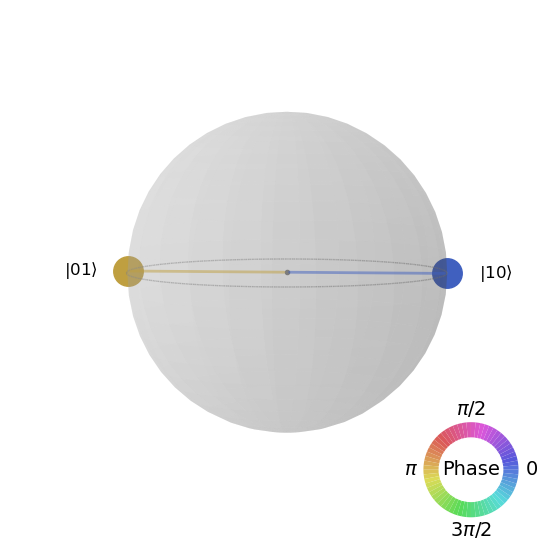

In [44]:

# Show a bell state in qsphere 
# plot_bloch_vector(phi_pos)
# plot_state_qsphere(phi_pos)

# plot_state_qsphere(phi_neg)
# plot_state_qsphere(psi_pos)
plot_state_qsphere(psi_neg)

# plot_state_qsphere(psi_neg_without_z)

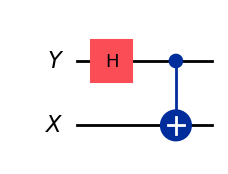

<IPython.core.display.Latex object>

In [70]:
# Or we can do it like this 
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

### Addition of classical bits and what they do. 

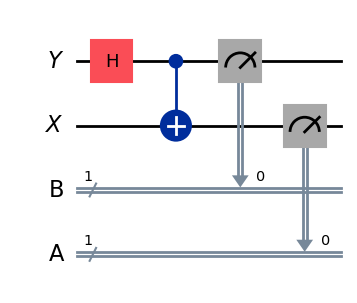

In [71]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y) 
circuit.cx(Y,X)
circuit.measure(Y, B) 
circuit.measure(X, A)

display(circuit.draw(output="mpl"))




### For simulation of a desired circuit we use AER 

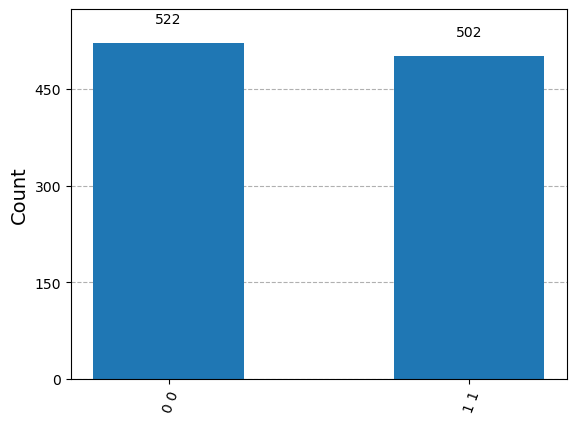

In [75]:
from qiskit_aer import AerSimulator
# import visualization histog
from qiskit.visualization import plot_histogram
result = AerSimulator().run(circuit).result()
stats = result.get_counts()
display(plot_histogram(stats))

